<a href="https://colab.research.google.com/github/rcollmenendez/propulsion_challenges/blob/main/MyLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a LinearRegression

In this notebook we will build a linear regression model implementing all the functions from scratch.

In [125]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

# Data

In [126]:
# For this experiment we will use the salary data
salary_df = pd.read_csv("/content/drive/MyDrive/0_data/04_MachineLearning/Salary_Data.csv")
print(salary_df.shape)
salary_df.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data preparation

In [127]:
# Extract response variable and features
y = salary_df[["Salary"]].values # response variable
X = salary_df[["YearsExperience"]].values # features

X = np.hstack((np.ones((X.shape[0], 1)), X)) # Column of "1" for the intercept


# Linear regression

$ y_i = \beta_{0} + \beta_{1} x_{1} + \varepsilon $

In [128]:
# Linear regression process

# 1. Initialise some random betas
# beta = random.rand(X.shape[1], 1)
beta = np.array([[0], [5000]])

# 2. Calculate the predictions based on random betas
y_pred = np.dot(X, beta)

# 3. Calculate the error / loss function - Mean squared error
n = len(y)
cost = 1 / (2 * n) * np.sum(np.square(y - y_pred))

# 4. Calculate the gradient (based on the derivative of the loss function)
gradient = 1 / n * np.dot(X.T, (y_pred - y))

# 5. Update the betas based on the gradient and a learning rate
lr = 0.01
new_beta = beta - lr * gradient

# Repeat steps 2 to 5 until the gradient descent is below a define threshold

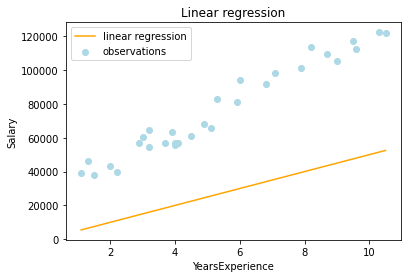

In [129]:
# Plot example of a initial linear regression model based on "y = 0 + 5000"
fig, ax = plt.subplots()

ax.scatter(salary_df["YearsExperience"], salary_df["Salary"], color="lightblue", label="observations")
ax.plot(salary_df["YearsExperience"], y_pred, color="orange", label="linear regression")

ax.set_ylabel("Salary")
ax.set_xlabel("YearsExperience")
ax.set_title("Linear regression")
ax.legend();

In [130]:
import time
from IPython import display

# Define functions

def my_linear_regression(X, y, lr, beta=None, num_iter=100):
  """
  Calculate the optimal betas for a linear regression problem.

  Parameters:
    X: matrix of features.
    y: vector with the response variable.
    lr: learning rate for the gradient descent.
    beta: initial betas.
    num_iter: max number of iterations for the betas adjustment.

  Return:
    cost: mse value for the optimized betas.
    beta: optimized betas.

  """
  if not beta:
    # Init random betas
    beta = random.rand(X.shape[1], 1)
  
  for iter in range(1, num_iter+1):
    
    # 2. Calculate the predictions
    y_pred = np.dot(X, beta)

    # 3. Calculate the error
    n = len(y)
    cost = 1 / (2 * n) * np.sum(np.square(y - y_pred))
    cost = round(cost)

    # 4. Calculate the gradient (based on the derivative of the loss function)
    gradient = 1 / n * np.dot(X.T, (y_pred - y))

    # 5. Update the betas based on the gradient and a learning rate
    beta -= lr * gradient

  # Dynamic plotting - WIP------------------------------------------------------

    # fig, ax = plt.subplots()

    # plt.gca().cla()

    # ax.scatter(salary_df["YearsExperience"], salary_df["Salary"], color="lightblue", label="observations")
    # ax.plot(salary_df["YearsExperience"], y_pred, color="orange", label="lr")

    # ax.set_ylabel("Salary")
    # ax.set_xlabel("YearsExperience")
    # ax.set_title("Linear regression")
    # ax.legend()

    # display.clear_output(wait=True)
    # display.display(plt.gcf());
    # time.sleep(0.5)

    # plt.ioff()

  # ----------------------------------------------------------------------------

  return cost, beta

In [131]:
cost, beta= my_linear_regression(X, y, 0.01, None, 1000)

Mean Squared Error (MSE): 16530655
Root Mean Squared Error (RMSE): 4066
Intercept: 22920
Coef: 9876


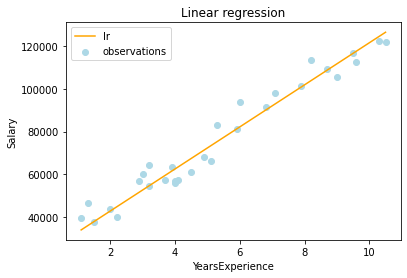

In [132]:
# Plot the final result
y_pred = np.dot(X, beta)

fig, ax = plt.subplots()

ax.scatter(salary_df["YearsExperience"], salary_df["Salary"], color="lightblue", label="observations")
ax.plot(salary_df["YearsExperience"], y_pred, color="orange", label="lr")

ax.set_ylabel("Salary")
ax.set_xlabel("YearsExperience")
ax.set_title("Linear regression")
ax.legend();

print("Mean Squared Error (MSE):", cost)
print("Root Mean Squared Error (RMSE):", round(np.sqrt(cost)))

print("Intercept:", round(beta[0][0]))
print("Coef:", round(beta[1][0]))

# Linear regression using sklearn

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y = salary_df[["Salary"]].values # response variable
X = salary_df[["YearsExperience"]].values # features

# Initialise the linear regression class
lr = LinearRegression()

# Fit the lr
lr.fit(X, y)

# Predict the y
y_pred = lr.predict(y)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", round(mse))
print("Root Mean Squared Error (RMSE):", round(rmse))

print("Intercept:", round(lr.intercept_[0]))
print("Coef:", round(lr.coef_[0][0]))

Mean Squared Error (MSE): 580639679274243328
Root Mean Squared Error (RMSE): 761997165
Intercept: 25792
Coef: 9450
